In [1]:
import matplotlib.pyplot as plt
import torch

from experiments.data_processing.dockstring_params import DOCKSTRING_DATASET_HPARAMS
from experiments.data_processing.load_torch import LOADERS

In [2]:
LOADERS

{'ESR2': <function experiments.data_processing.load_torch.load_torch_esr2(standardize: bool, dtype: torch.dtype, device: torch.device) -> tuple[torch.Tensor]>,
 'F2': <function experiments.data_processing.load_torch.load_torch_f2(standardize: bool, dtype: torch.dtype, device: torch.device) -> tuple[torch.Tensor]>,
 'KIT': <function experiments.data_processing.load_torch.load_torch_kit(standardize: bool, dtype: torch.dtype, device: torch.device) -> tuple[torch.Tensor]>,
 'PARP1': <function experiments.data_processing.load_torch.load_torch_parp1(standardize: bool, dtype: torch.dtype, device: torch.device) -> tuple[torch.Tensor]>,
 'PGR': <function experiments.data_processing.load_torch.load_torch_pgr(standardize: bool, dtype: torch.dtype, device: torch.device) -> tuple[torch.Tensor]>,
 'acsincome': <function experiments.data_processing.load_torch.load_torch_acsincome(split_proportion: float, split_shuffle: bool, split_seed: int, standardize: bool, dtype: torch.dtype, device: torch.device

In [3]:
LOADERS = {"3droad": LOADERS["3droad"]} # just use 3droad for now

In [4]:
split_proportion = 0.1
split_shuffle = True
split_seed = 0
standardize = True
dtype = torch.float32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
for dataset_name, load_fn in LOADERS.items():
    print(f"Loading {dataset_name} dataset...")
    if dataset_name in list(DOCKSTRING_DATASET_HPARAMS.keys()):
        dataset = load_fn(
            standardize=standardize,
            dtype=dtype,
            device=device,
        )
    else:
        dataset = load_fn(
            split_proportion=split_proportion,
            split_shuffle=split_shuffle,
            split_seed=split_seed,
            standardize=standardize,
            dtype=dtype,
            device=device,
        )
    print(f"Loaded {dataset_name} dataset, Xtr.shape={dataset.Xtr.shape}, Xtst.shape={dataset.Xtst.shape}, "
          f"ytr.shape={dataset.ytr.shape}, ytst.shape={dataset.ytst.shape}, Xtr.dtype={dataset.Xtr.dtype}, Xtr.col_mean={torch.mean(dataset.Xtr, dim=0)}, ytr.mean={torch.mean(dataset.ytr).item()}, ")


Loading 3droad dataset...
Loaded 3droad dataset, Xtr.shape=torch.Size([391386, 2]), Xtst.shape=torch.Size([43488, 2]), ytr.shape=torch.Size([391386]), ytst.shape=torch.Size([43488]), Xtr.dtype=torch.float32, Xtr.col_mean=tensor([7.7973e-11, 9.7466e-11], device='cuda:0'), ytr.mean=0.0, 


(array([1.0000e+00, 2.0000e+00, 9.8000e+01, 3.1496e+04, 4.3700e+04,
        3.4710e+04, 2.7152e+04, 2.6940e+04, 2.3545e+04, 2.2445e+04,
        2.0523e+04, 1.9107e+04, 1.9782e+04, 1.7143e+04, 1.5101e+04,
        1.2421e+04, 1.0570e+04, 9.0540e+03, 8.1960e+03, 7.4890e+03,
        6.4240e+03, 5.7210e+03, 4.6230e+03, 3.8930e+03, 3.3560e+03,
        3.1020e+03, 2.6630e+03, 2.1970e+03, 2.0690e+03, 1.8780e+03,
        1.4020e+03, 1.0360e+03, 8.7500e+02, 6.4100e+02, 4.9400e+02,
        4.3400e+02, 3.2500e+02, 2.1100e+02, 1.2600e+02, 1.3000e+02,
        1.2900e+02, 8.5000e+01, 2.2000e+01, 1.2000e+01, 1.6000e+01,
        1.3000e+01, 1.2000e+01, 6.0000e+00, 1.2000e+01, 4.0000e+00]),
 array([-1.65443194e+00, -1.50401521e+00, -1.35359859e+00, -1.20318186e+00,
        -1.05276513e+00, -9.02348399e-01, -7.51931727e-01, -6.01515055e-01,
        -4.51098323e-01, -3.00681591e-01, -1.50264859e-01,  1.51753426e-04,
         1.50568485e-01,  3.00985217e-01,  4.51401830e-01,  6.01818681e-01,
         7.522

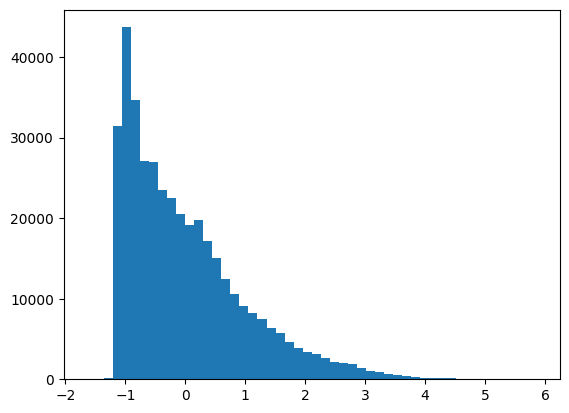

In [6]:
plt.hist(dataset.ytr.cpu().numpy(), bins=50)